## Predicting Car Prices

####  Introduction

This project aims at prediction of various cars' market prices based their attributes such as weight of the car, acceleration speed, miles per gallon, among others.

The automobile dataset used is from the UCI Machine Learning Repository, and can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

#### About the dataset

This dataset consists of three entity types:-

(a) **Specification** - In terms of various characteristics of the auto  

(b) **Assigned insurance risk rating** - The degree to which an auto is more risky other than its price indicates

(c) **Normalized losses in use** - Relative loss payment per insured vehicle per year, as compared to other cars.  

##### Reading the dataframe

The dataset in its initial form has 26 columns each giving some info about different autos.

However, the column names don't give very clear information as they are, and therefore renaming the columns when reading the dataframe is necessary.

In [1]:
import pandas as pd

new_cols = ['Symbol', 'Normalized_loss', 'Make', 'Fuel_type', 'Aspiration', 'No_of_doors', 'Body_style', 'Drive_wheels',
           'Engine_loc', 'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type', 'No_of_cylinders',
           'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio', 'Horse_power', 'Peak_rpm', 'City_mpg',
           'Highway_mpg', 'Price']

cars = pd.read_csv('imports-85.data', names = new_cols)

cars.head(3)

,Symbol,Normalized_loss,Make,Fuel_type,Aspiration,No_of_doors,Body_style,Drive_wheels,Engine_loc,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


##### Data Cleaning

In [2]:
print('The dataset has {} records and {} columns'.format(cars.shape[0], cars.shape[1]))
print(' ')
print('Info on number of non-null values and the datatype of each column: ')
print(' ')
cars.info()

The dataset has 205 records and 26 columns
 
Info on number of non-null values and the datatype of each column: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
Symbol               205 non-null int64
Normalized_loss      205 non-null object
Make                 205 non-null object
Fuel_type            205 non-null object
Aspiration           205 non-null object
No_of_doors          205 non-null object
Body_style           205 non-null object
Drive_wheels         205 non-null object
Engine_loc           205 non-null object
Wheel_base           205 non-null float64
Length               205 non-null float64
Width                205 non-null float64
Height               205 non-null float64
Curb_weight          205 non-null int64
Engine_type          205 non-null object
No_of_cylinders      205 non-null object
Engine_size          205 non-null int64
Fuel_system          205 non-null object
Bore                 205 non-null object


There are columns that are of object datatype but the values are/ should be either int or float:

- Normalized_loss
- Bore 
- Stroke
- Horse_power
- Peak_rpm
- Price

Such columns need to be cleaned before continuing with the analysis;

In [3]:
import numpy as np

In [4]:
# list of columns that need some cleaning
numeric_cols = ['Normalized_loss', 'Bore', 'Stroke', 'Horse_power', 'Peak_rpm', 'Price']

# Remove whitespaces and '?' in the columns:
def strip_cols(df):
    for col in numeric_cols:
        df[col] = df[col].str.replace('?', ' ')#np.nan)
        df[col] = df[col].str.strip()
        
    return df
        
cars = strip_cols(cars)
cars[numeric_cols] = cars[numeric_cols].apply(pd.to_numeric)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
Symbol               205 non-null int64
Normalized_loss      164 non-null float64
Make                 205 non-null object
Fuel_type            205 non-null object
Aspiration           205 non-null object
No_of_doors          205 non-null object
Body_style           205 non-null object
Drive_wheels         205 non-null object
Engine_loc           205 non-null object
Wheel_base           205 non-null float64
Length               205 non-null float64
Width                205 non-null float64
Height               205 non-null float64
Curb_weight          205 non-null int64
Engine_type          205 non-null object
No_of_cylinders      205 non-null object
Engine_size          205 non-null int64
Fuel_system          205 non-null object
Bore                 201 non-null float64
Stroke               201 non-null float64
Compression_ratio    205 non-null float64
Horse_power          203 non-

In this mini-project, we'll only use numeric columns for the prediction and ignore columns with string values. Otherwise some of the object columns can be encoded for better results.

In [6]:
cars = cars.select_dtypes(exclude = ['object']).copy()
cars.head()

,Symbol,Normalized_loss,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


##### Handling missing values

In [7]:
missing_vals = cars.columns[cars.isna().any()]
cars[missing_vals].isna().sum()/len(cars)

Normalized_loss    0.200000
Bore               0.019512
Stroke             0.019512
Horse_power        0.009756
Peak_rpm           0.009756
Price              0.019512
dtype: float64

In [8]:
# An overview of the rows with missing values
null_data = cars[cars.isnull().any(axis=1)]
null_data

,Symbol,Normalized_loss,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


Here's how the missing values will be handled:-

- Missing values in the price column bore, stroke, horse_power, price and peak_rpm will be dropped to avoid imputing values 
- Missing values in the Normalized loss column will be replaced by average values in that column


In [9]:
cars = cars.dropna(subset = ['Bore', 'Stroke', 'Horse_power', 'Peak_rpm', 'Price'])
avg_loss = cars['Normalized_loss'].mean()
cars['Normalized_loss'] = cars['Normalized_loss'].fillna(value = avg_loss)
cars.isna().sum()


Symbol               0
Normalized_loss      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_size          0
Bore                 0
Stroke               0
Compression_ratio    0
Horse_power          0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
Price                0
dtype: int64

In [10]:
# imputing price column
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# cars = pd.DataFrame(imputer.fit_transform(cars),columns = cars.columns)
# cars.isna().sum()

#### Prediction

**1. Univariate Model**

We'll use the holdout validation and K-Fold cross-validation methods to build the predictive model.

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# import math

def knn_train_test_univariate(df, feature_col, target_col):
    
    # train and test sets
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # model building
    model = KNeighborsRegressor()
    model.fit(train_set[[feature_col]], train_set[target_col])
    predictions = model.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse
                

In [12]:
all_features = cars.columns.tolist()
all_features.remove('Price')

rmse_dict = {}
for col in all_features:
    rmse_dict[col] = knn_train_test_univariate(cars, col, 'Price')
    
rmse_dict = sorted(rmse_dict.items(), key=lambda x: x[1])
print('The following are the rmse values for each feature column:')
print(' ')
rmse_dict

The following are the rmse values for each feature column:
 


[('Engine_size', 3410.0097430586766),
 ('City_mpg', 4260.203099929986),
 ('Highway_mpg', 4410.268454506633),
 ('Horse_power', 4524.008287628419),
 ('Curb_weight', 4905.019971749891),
 ('Width', 5722.673464850683),
 ('Length', 6370.335072980134),
 ('Wheel_base', 6678.320083307032),
 ('Compression_ratio', 6772.861348629182),
 ('Normalized_loss', 7198.601666792159),
 ('Bore', 7203.586631813407),
 ('Peak_rpm', 7741.285602533987),
 ('Height', 8342.266854362053),
 ('Stroke', 8372.705575614036),
 ('Symbol', 8768.238555125643)]

Using the default number neighbors (k = 5), engine size gave the best prediction of car prices.

We'll look for the best random seed then change it in the function to improve the results.


In [13]:
def knn_train_test_univariate(df, feature_col, target_col, n):
    
    # train and test sets
    np.random.seed(n)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # model building
    model = KNeighborsRegressor()
    model.fit(train_set[[feature_col]], train_set[target_col])
    predictions = model.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

seed_dictionary = {}
for n in list(range(0,100)):
    seed_dictionary[n] = knn_train_test_univariate(cars, 'Engine_size', 'Price', n)
 
min(seed_dictionary.items(), key=lambda x: x[1])

(73, 2765.6224435016434)

The best random seed for 'Engine size column' is 73

The next step is modifying the function to use various values of k:

In [14]:
def knn_train_test_univariate(df, feature_col, target_col, k_values):
    
    # train and test sets
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    #model building
    k_rmse = {}
    for k in k_values:
        
        model = KNeighborsRegressor(n_neighbors = k)
        model.fit(train_set[[feature_col]], train_set[target_col])
        predictions = model.predict(test_set[[feature_col]])
        k_rmse[k] = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return k_rmse

In [15]:
# which k gives the best model for each feature column?
hyper_params = [1,3,5,7,9]

rmses_dict = {}
for col in all_features:
    rmses_dict[col] = knn_train_test_univariate(cars, col, 'Price', hyper_params)

print('Features and their error metrics for each k-value: ')
# rmses_dict = sorted(rmses_dict.items(), key=lambda x: x[1])
rmses_dict

Features and their error metrics for each k-value: 


{'Bore': {1: 6446.94335736411,
  3: 6924.871791833646,
  5: 7203.586631813407,
  7: 7230.266415131437,
  9: 6818.436274729879},
 'City_mpg': {1: 4922.293584565336,
  3: 4171.413458876734,
  5: 4260.203099929986,
  7: 4412.0012651496145,
  9: 4554.333692950846},
 'Compression_ratio': {1: 6681.168341552491,
  3: 6595.645045034694,
  5: 6772.861348629182,
  7: 6974.591653407275,
  9: 7372.0404291272935},
 'Curb_weight': {1: 5630.775319978736,
  3: 5172.1498697843435,
  5: 4905.019971749891,
  7: 4862.33264732263,
  9: 4900.515076061698},
 'Engine_size': {1: 3231.975556838263,
  3: 3167.9646761512986,
  5: 3410.0097430586766,
  7: 4046.987727327515,
  9: 3906.326157788211},
 'Height': {1: 10450.830485991952,
  3: 8601.819152704133,
  5: 8342.266854362053,
  7: 8345.815404683628,
  9: 8526.88571584526},
 'Highway_mpg': {1: 6332.315038348768,
  3: 5105.6049089598155,
  5: 4410.268454506633,
  7: 4486.6530028348225,
  9: 4830.883905953361},
 'Horse_power': {1: 5216.09369046944,
  3: 4605.2526

In [16]:
# Creating a dataframe to hold each feature and its error metrics for each value of k
data = pd.DataFrame.from_dict(rmses_dict)
# data.insert(loc = 0, column = 'N_neighbors', value = [1,3,5,7,9])
data

,Bore,City_mpg,Compression_ratio,Curb_weight,Engine_size,Height,Highway_mpg,Horse_power,Length,Normalized_loss,Peak_rpm,Stroke,Symbol,Wheel_base,Width
1,6446.943357,4922.293585,6681.168342,5630.775320,3231.975557,10450.830486,6332.315038,5216.093690,5804.669576,9114.630315,8782.634094,8309.184117,9855.900294,5191.431141,5938.167300
3,6924.871792,4171.413459,6595.645045,5172.149870,3167.964676,8601.819153,5105.604909,4605.252612,6133.423796,6610.203645,7533.003823,8100.314022,8402.051926,6338.191732,5666.072972
5,7203.586632,4260.203100,6772.861349,4905.019972,3410.009743,8342.266854,4410.268455,4524.008288,6370.335073,7198.601667,7741.285603,8372.705576,8768.238555,6678.320083,5722.673465
7,7230.266415,4412.001265,6974.591653,4862.332647,4046.987727,8345.815405,4486.653003,4431.055084,6352.777013,7343.386693,8069.306809,8383.999266,8259.005950,6906.121855,5713.671150
9,6818.436275,4554.333693,7372.040429,4900.515076,3906.326158,8526.885716,4830.883906,4603.504691,6407.858394,7353.026846,8054.923875,8406.443039,8072.057122,7115.077589,5835.808502


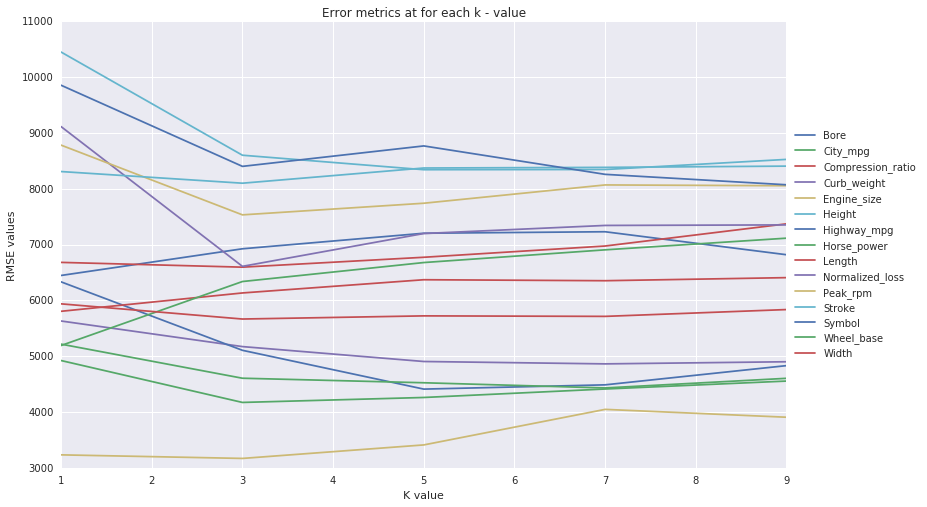

In [17]:
# Visualizing on line chart
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#plotting
for col in list(data.columns):
    data[col].plot(figsize = (13,8))

plt.title('Error metrics at for each k - value')
plt.xlabel('K value')
plt.ylabel('RMSE values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

For each of the features, the model performs best at different values of K

**2. Multivariate Model**

In [18]:
# Modifying the function to accept list of feature columns
def knn_train_test_multivariate(df, feature_cols, target_col):
    
    # train and test sets
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    #model building
    model = KNeighborsRegressor(n_neighbors = 5)
    model.fit(train_set[feature_cols], train_set[target_col])
    predictions = model.predict(test_set[feature_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [19]:
# best features:
# average mse value in each column
mean_rmses = data.mean().sort_values()
mean_rmses
best_features = list(mean_rmses.index)

In [20]:
two_features = best_features[:2]
three_features = best_features[:3]
four_features = best_features[:4]
five_features = best_features[:5]

select_lst = [two_features, three_features, four_features,five_features]

select_output = []
for item in select_lst:
    select_output.append(knn_train_test_multivariate(cars, item, 'Price'))
    
select_dict = {'two_features': select_output[0],
              'three_features': select_output[1],
              'four_features': select_output[2],
              'five_features': select_output[3]
              }
select_dict

{'five_features': 4647.141117824979,
 'four_features': 3676.937163799595,
 'three_features': 3773.5422395777623,
 'two_features': 3359.6021156545016}

In [21]:
print(two_features)
print(three_features)
print(four_features)
print(five_features)

['Engine_size', 'City_mpg']
['Engine_size', 'City_mpg', 'Horse_power']
['Engine_size', 'City_mpg', 'Horse_power', 'Highway_mpg']
['Engine_size', 'City_mpg', 'Horse_power', 'Highway_mpg', 'Curb_weight']


The best model is the model with 2 independent variables: ('Engine_size', 'City_mpg')

**Hyperparameter Optimization**

In [22]:
def knn_train_test_multivariate(df, feature_cols, target_col, k_values):
    
    # train and test sets
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    #model building
    k_rmse = {}
    for k in k_values:
        
        model = KNeighborsRegressor(n_neighbors = k)
        model.fit(train_set[feature_cols], train_set[target_col])
        predictions = model.predict(test_set[feature_cols])
        k_rmse[k] = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return k_rmse

In [23]:
hyp_params = list(range(1, 26))
top_three = [two_features, three_features, four_features]

selected = []
for item in top_three:
    selected.append(knn_train_test_multivariate(cars, item, 'Price', hyp_params))

print('Features and their error metrics for each k-value: ')
best_dict = {'two_features': selected[0],
              'three_features': selected[1],
              'four_features': selected[2],
              }
best_dict

Features and their error metrics for each k-value: 


{'four_features': {1: 3944.5927132556267,
  2: 3047.5885833670836,
  3: 2830.9094970519395,
  4: 3204.2192592306305,
  5: 3676.937163799595,
  6: 4014.569807704146,
  7: 4119.910840998374,
  8: 4253.961089002513,
  9: 4476.736633656846,
  10: 4407.6074886357055,
  11: 4429.408571636256,
  12: 4465.262451293156,
  13: 4440.887707769172,
  14: 4517.426068574613,
  15: 4529.577322208826,
  16: 4437.912639287675,
  17: 4468.181619067073,
  18: 4505.937732811876,
  19: 4595.517539293528,
  20: 4663.1173642183285,
  21: 4750.237891298205,
  22: 4844.994878394497,
  23: 4956.155727021344,
  24: 5013.183506484215,
  25: 5057.140630291681},
 'three_features': {1: 3920.429920978836,
  2: 3021.791309701541,
  3: 2904.6202646966035,
  4: 3297.3002954721014,
  5: 3773.5422395777623,
  6: 4055.418252459412,
  7: 4156.24423971129,
  8: 4292.517802764896,
  9: 4488.332293951416,
  10: 4425.684656926092,
  11: 4419.107811144363,
  12: 4447.901871751271,
  13: 4427.662967996695,
  14: 4501.973592204456,

In [24]:
best_df = pd.DataFrame.from_dict(best_dict)
best_df

,four_features,three_features,two_features
1,3944.592713,3920.429921,3085.660006
2,3047.588583,3021.791310,3092.265068
3,2830.909497,2904.620265,3165.920287
4,3204.219259,3297.300295,3142.178485
5,3676.937164,3773.542240,3359.602116
6,4014.569808,4055.418252,3670.019336
7,4119.910841,4156.244240,3861.626124
8,4253.961089,4292.517803,3796.440459
9,4476.736634,4488.332294,3800.978771
10,4407.607489,4425.684657,3901.477301


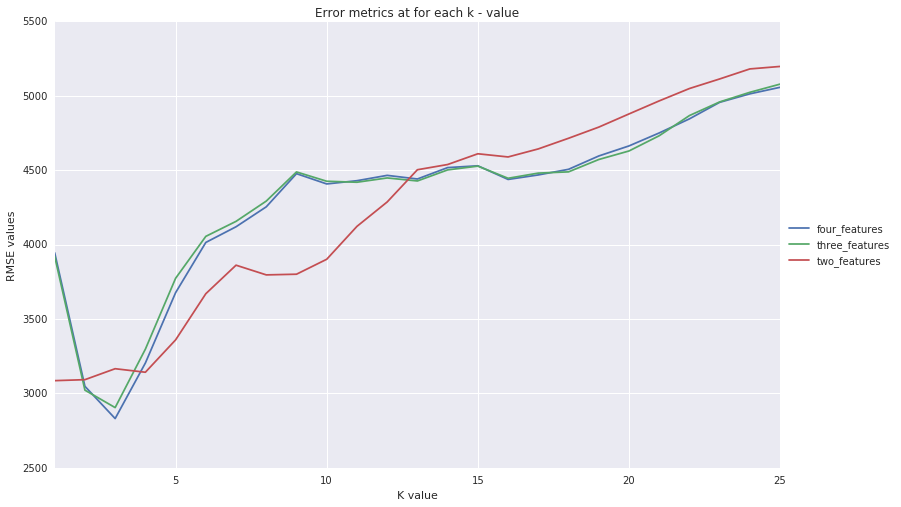

In [25]:
#plotting
for col in list(best_df.columns):
    best_df[col].plot(figsize = (13,8))

plt.title('Error metrics at for each k - value')
plt.xlabel('K value')
plt.ylabel('RMSE values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [26]:
# rmse averages
best_df.min()

four_features     2830.909497
three_features    2904.620265
two_features      3085.660006
dtype: float64

#### Additional: Using kfold validation technique for the three best models

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

def knn_train_test_kfold(df, feature_cols, target_col, n_folds):
    '''
    folds: a list of number of folds
    '''
    # train and test sets
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))

    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # splitting the dataframe into folds 
    for fold in n_folds:
        kf = KFold(fold, shuffle=True, random_state=1) 

        # model building
        model = KNeighborsRegressor()
        mses = cross_val_score(model, train_set[feature_cols], train_set["Price"], scoring="neg_mean_squared_error", cv=kf)
        
        mean_mse = np.mean(np.abs(mses))
        kfold_rmse = np.sqrt(mean_mse)
                       
    return kfold_rmse
               

In [28]:
n_folds = list(range(2,50))
kfold_rmses = []
for lst in select_lst:
    kfold_rmses.append(knn_train_test_kfold(cars, lst, 'Price', n_folds))

kfold_dict = {'Two best features': kfold_rmses[0], 'Three best features': kfold_rmses[1], 
              'Four best features': kfold_rmses[2],'Five best features': kfold_rmses[3]}
kfold_dict

{'Five best features': 3243.28552796672,
 'Four best features': 3328.533343313691,
 'Three best features': 3346.1640302816922,
 'Two best features': 3014.8866235155615}

##### Summary of the models' performance

**1. Univariate model**

In [29]:
data
print('The minimum rmse for each predictor variable:')
print(' ')
print(data.min())

The minimum rmse for each predictor variable:
 
Bore                 6446.943357
City_mpg             4171.413459
Compression_ratio    6595.645045
Curb_weight          4862.332647
Engine_size          3167.964676
Height               8342.266854
Highway_mpg          4410.268455
Horse_power          4431.055084
Length               5804.669576
Normalized_loss      6610.203645
Peak_rpm             7533.003823
Stroke               8100.314022
Symbol               8072.057122
Wheel_base           5191.431141
Width                5666.072972
dtype: float64


> Engine size is the best predictor with an rmse of **3167**

**2. Multivariate model**

In [30]:
best_df
print('The minimum rmse for each set of predictor variables:')
print(' ')
print(best_df.min())

The minimum rmse for each set of predictor variables:
 
four_features     2830.909497
three_features    2904.620265
two_features      3085.660006
dtype: float64


> The best predictors for this model have an rmse of **2830**

**3. Kfold Validation Technique**


In [31]:
kfold_dict

{'Five best features': 3243.28552796672,
 'Four best features': 3328.533343313691,
 'Three best features': 3346.1640302816922,
 'Two best features': 3014.8866235155615}

> The best predictors for this model have an rmse of **3014**

#### Conclusion
The best performing model among the three options is the multivariate model with four independent variables, and 3 k-neighbours.

This implies that Engine_size, City_mpg, Horse_power and Highway_mpg are the best predictors of car prices. We'll therefore use these parameters to get predicted prices.

#### Prediction

In [33]:
np.random.seed(0)
shuffled_index = np.random.permutation(cars.index)
cars = cars.reindex(index = shuffled_index)
split_loc = int(0.5*len(cars))

train_set = cars.iloc[:split_loc].copy()
test_set  = cars.iloc[split_loc:].copy()

knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(train_set[four_features], train_set['Price'])
test_set['Predicted_price'] = knn_model.predict(test_set[four_features])
test_set.head()

,Symbol,Normalized_loss,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price,Predicted_price
195,-1,74.0,104.3,188.8,67.2,57.5,3034,141,3.78,3.15,9.5,114.0,5400.0,23,28,13415.0,15146.666667
90,1,128.0,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0,7420.666667
114,0,121.3,114.2,198.9,68.4,58.7,3485,152,3.70,3.52,21.0,95.0,4150.0,25,25,17075.0,17615.000000
112,0,161.0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0,15323.000000
164,1,168.0,94.5,168.7,64.0,52.6,2204,98,3.19,3.03,9.0,70.0,4800.0,29,34,8238.0,7132.000000
